In [1]:
import numpy as np
import itertools
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer, HashingVectorizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import PassiveAggressiveClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn import metrics
import matplotlib.pyplot as plt

In [2]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [3]:
import pandas as pd
df = pd.read_csv('fake_or_real_news.csv')

In [4]:
df.shape

(6335, 4)

In [5]:
df.head()

,Unnamed: 0,title,text,label
0,8476,You Can Smell Hillary’s Fear,"Daniel Greenfield, a Shillman Journalism Fello...",FAKE
1,10294,Watch The Exact Moment Paul Ryan Committed Pol...,Google Pinterest Digg Linkedin Reddit Stumbleu...,FAKE
2,3608,Kerry to go to Paris in gesture of sympathy,U.S. Secretary of State John F. Kerry said Mon...,REAL
3,10142,Bernie supporters on Twitter erupt in anger ag...,"— Kaydee King (@KaydeeKing) November 9, 2016 T...",FAKE
4,875,The Battle of New York: Why This Primary Matters,It's primary day in New York and front-runners...,REAL


In [6]:
df = df.set_index('Unnamed: 0')

In [7]:
y = df.label

In [8]:
df = df.drop('label', axis=1)

In [9]:
X_train, X_test, y_train, y_test = train_test_split(df['text'], y, test_size=0.33, random_state=53)

In [10]:
print(X_train)

Unnamed: 0
8055                                                      
5656     Report Copyright Violation Do you think there ...
669      The election in 232 photos, 43 numbers and 131...
5630     Email Ever wonder what’s on the mind of today’...
9797     Wells Fargo is Rotting from the Top Down Wells...
3190     Donald Trump may have eased some Republican fe...
9211     Trump rape accuser skips press conference, cit...
132      As Harris lay struggling and dying, he told th...
3626     (CNN) A pair of dramatic raids Friday in Franc...
6561     Food mixology: When eaten together, these food...
987      Imagine this: Donald Trump wooing delegates wi...
9206     0 Add Comment \nON the verge of being elected,...
668      Was California The Last Weekend At Bernie's Ho...
4456     The presidential nomination contests are heati...
9207     ( Flickr / CC 2.0 ) \nI’m currently reading a ...
2376     Killing Obama administration rules, dismantlin...
7426     Brexiters set up demented ‘people’s 

In [11]:
count_vectorizer = CountVectorizer(stop_words='english')
count_train = count_vectorizer.fit_transform(X_train)
count_test = count_vectorizer.transform(X_test)

In [13]:
print(count_train)

  (1, 36831)	1
  (1, 47506)	1
  (1, 38823)	1
  (1, 25684)	1
  (1, 21568)	1
  (1, 36087)	1
  (1, 16814)	1
  (1, 49203)	2
  (1, 25686)	1
  (1, 15927)	2
  (1, 29531)	2
  (1, 8399)	1
  (1, 42534)	1
  (1, 21881)	1
  (1, 35256)	1
  (1, 35783)	4
  (1, 51896)	2
  (1, 44520)	2
  (1, 15924)	2
  (1, 50628)	1
  (1, 54177)	1
  (1, 12105)	1
  (1, 42470)	1
  (2, 9445)	1
  (2, 8779)	1
  :	:
  (4243, 30464)	1
  (4243, 35836)	2
  (4243, 48084)	2
  (4243, 22146)	1
  (4243, 9042)	2
  (4243, 35190)	2
  (4243, 52934)	1
  (4243, 35037)	1
  (4243, 55388)	2
  (4243, 43875)	1
  (4243, 43172)	1
  (4243, 3441)	1
  (4243, 35035)	1
  (4243, 11982)	2
  (4243, 39633)	4
  (4243, 22069)	1
  (4243, 7184)	1
  (4243, 14871)	1
  (4243, 41311)	1
  (4243, 50690)	1
  (4243, 27842)	1
  (4243, 37695)	1
  (4243, 38823)	1
  (4243, 51896)	6
  (4243, 50628)	1


In [12]:
tfidf_vectorizer = TfidfVectorizer(stop_words='english', max_df=0.7)
tfidf_train = tfidf_vectorizer.fit_transform(X_train)
tfidf_test = tfidf_vectorizer.transform(X_test)

In [14]:
print(tfidf_train)

  (1, 42470)	0.07711040274149526
  (1, 12105)	0.15008066461476866
  (1, 54177)	0.13782629144711137
  (1, 50628)	0.061296988343109586
  (1, 15924)	0.3479045460649079
  (1, 44520)	0.4973826512693341
  (1, 51896)	0.11596517664605868
  (1, 35783)	0.30902690818827977
  (1, 35256)	0.12628385718450857
  (1, 21881)	0.21271688045815978
  (1, 42534)	0.06081715886809217
  (1, 8399)	0.08729542880625335
  (1, 29531)	0.1454406205718245
  (1, 15927)	0.4973826512693341
  (1, 25686)	0.13550453594288983
  (1, 49203)	0.1672740861784377
  (1, 16814)	0.10404977746548139
  (1, 36087)	0.12648679854389897
  (1, 21568)	0.1007920919566398
  (1, 25684)	0.1030420922189754
  (1, 38823)	0.06048803110658644
  (1, 47506)	0.14539060877460044
  (1, 36831)	0.10772488937433067
  (2, 16972)	0.1606296088662543
  (2, 762)	0.48803966069171073
  :	:
  (4243, 41435)	0.02969665315895183
  (4243, 53607)	0.044665186536595916
  (4243, 659)	0.04293180970016178
  (4243, 38834)	0.037049324915825195
  (4243, 19003)	0.03443753105034290

In [16]:
tfidf_vectorizer.get_feature_names()[-10:]

['حلب', 'عربي', 'عن', 'لم', 'ما', 'محاولات', 'من', 'هذا', 'والمرضى', 'ยงade']

In [17]:
count_vectorizer.get_feature_names()[:10]

['00',
 '000',
 '0000',
 '00000031',
 '000035',
 '00006',
 '0001',
 '0001pt',
 '000ft',
 '000km']

In [18]:
count_df = pd.DataFrame(count_train.A, columns=count_vectorizer.get_feature_names())

In [19]:
tfidf_df = pd.DataFrame(tfidf_train.A, columns=tfidf_vectorizer.get_feature_names())

In [20]:
difference = set(count_df.columns) - set(tfidf_df.columns)
difference

set()

In [22]:
print(count_df.equals(tfidf_df))

False


In [23]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
   
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

In [24]:
clf = MultinomialNB() 

accuracy:   0.857
Confusion matrix, without normalization


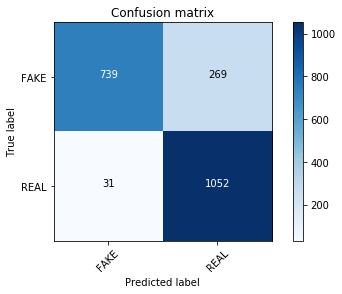

In [25]:
clf.fit(tfidf_train, y_train)
pred = clf.predict(tfidf_test)
score = metrics.accuracy_score(y_test, pred)
print("accuracy:   %0.3f" % score)
cm = metrics.confusion_matrix(y_test, pred, labels=['FAKE', 'REAL'])
plot_confusion_matrix(cm, classes=['FAKE', 'REAL'])

In [26]:
clf = MultinomialNB(alpha=0.1)

In [27]:
last_score = 0
for alpha in np.arange(0,1,.1):
    nb_classifier = MultinomialNB(alpha=alpha)
    nb_classifier.fit(tfidf_train, y_train)
    pred = nb_classifier.predict(tfidf_test)
    score = metrics.accuracy_score(y_test, pred)
    if score > last_score:
        clf = nb_classifier
    print("Alpha: {:.2f} Score: {:.5f}".format(alpha, score))

C:\Users\Aman\Anaconda3\lib\site-packages\sklearn\naive_bayes.py:480: UserWarning: alpha too small will result in numeric errors, setting alpha = 1.0e-10
  'setting alpha = %.1e' % _ALPHA_MIN)


Alpha: 0.00 Score: 0.88140
Alpha: 0.10 Score: 0.89766
Alpha: 0.20 Score: 0.89383
Alpha: 0.30 Score: 0.89000
Alpha: 0.40 Score: 0.88570
Alpha: 0.50 Score: 0.88427
Alpha: 0.60 Score: 0.87470
Alpha: 0.70 Score: 0.87040
Alpha: 0.80 Score: 0.86609
Alpha: 0.90 Score: 0.85892


In [32]:
feature_names = tfidf_vectorizer.get_feature_names()

In [33]:
sorted(zip(clf.coef_[0], feature_names), reverse=True)[:20]

[(-6.257361214701582, 'trump'),
 (-6.494453094312678, 'said'),
 (-6.6539784739838845, 'clinton'),
 (-7.037944662867073, 'obama'),
 (-7.146539983381228, 'sanders'),
 (-7.215376008647511, 'president'),
 (-7.266562805741617, 'campaign'),
 (-7.2875931446681514, 'republican'),
 (-7.341118458599064, 'state'),
 (-7.341357110247905, 'cruz'),
 (-7.378312441985425, 'party'),
 (-7.44688067245789, 'new'),
 (-7.476288801154588, 'people'),
 (-7.547225599514773, 'percent'),
 (-7.5553074094582335, 'bush'),
 (-7.580150633909893, 'republicans'),
 (-7.5855405012652435, 'house'),
 (-7.634478172520314, 'voters'),
 (-7.648482443695299, 'rubio'),
 (-7.6734836186463795, 'states')]

In [34]:
sorted(zip(clf.coef_[0], feature_names))[:20]

[(-11.349866225220305, '0000'),
 (-11.349866225220305, '000035'),
 (-11.349866225220305, '0001'),
 (-11.349866225220305, '0001pt'),
 (-11.349866225220305, '000km'),
 (-11.349866225220305, '0011'),
 (-11.349866225220305, '006s'),
 (-11.349866225220305, '007'),
 (-11.349866225220305, '007s'),
 (-11.349866225220305, '008s'),
 (-11.349866225220305, '0099'),
 (-11.349866225220305, '00am'),
 (-11.349866225220305, '00p'),
 (-11.349866225220305, '00pm'),
 (-11.349866225220305, '014'),
 (-11.349866225220305, '015'),
 (-11.349866225220305, '018'),
 (-11.349866225220305, '01am'),
 (-11.349866225220305, '020'),
 (-11.349866225220305, '023')]

In [35]:
mn_count_clf = MultinomialNB(alpha=0.1) 

In [36]:
mn_count_clf.fit(count_train, y_train)
pred = mn_count_clf.predict(count_test)
score = metrics.accuracy_score(y_test, pred)
print("accuracy:   %0.3f" % score)

accuracy:   0.893


In [37]:
mn_tfidf_clf = MultinomialNB(alpha=0.1) 

In [38]:
mn_tfidf_clf.fit(tfidf_train, y_train)
pred = mn_tfidf_clf.predict(tfidf_test)
score = metrics.accuracy_score(y_test, pred)
print("accuracy:   %0.3f" % score)

accuracy:   0.898


In [40]:
mn_count_clf.predict_proba?

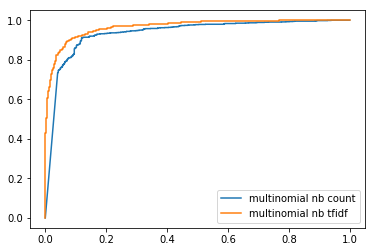

In [41]:
plt.figure(0).clf()

for model, name in [ (mn_count_clf, 'multinomial nb count'),
                     (mn_tfidf_clf, 'multinomial nb tfidf'),
                     ]:
    if 'count' in name:
        pred = model.predict_proba(count_test)[:,1]
    elif 'multinomial' in name:
        pred = model.predict_proba(tfidf_test)[:,1]
    else: 
        pred = model.decision_function(tfidf_test)
    fpr, tpr, thresh = metrics.roc_curve(y_test.values, pred, pos_label='REAL')
    plt.plot(fpr,tpr,label="{}".format(name))

plt.legend(loc=0)